In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats, optimize
from pybaselines import Baseline

https://stackoverflow.com/questions/78281290/scipy-find-peaks-function-wont-identify-a-peak-in-carbon-xps-data

In [2]:
x = np.array([541.0, 540.898, 540.797, 540.695, 540.594, 540.492, 540.391, 540.289, 540.187, 540.086, 539.984, 539.883, 539.781, 539.68, 539.578, 539.477, 539.375, 539.273, 539.172, 539.07, 538.969, 538.867, 538.766, 538.664, 538.563, 538.461, 538.359, 538.258, 538.156, 538.055, 537.953, 537.852, 537.75, 537.648, 537.547, 537.445, 537.344, 537.242, 537.141, 537.039, 536.938, 536.836, 536.734, 536.633, 536.531, 536.43, 536.328, 536.227, 536.125, 536.023, 535.922, 535.82, 535.719, 535.617, 535.516, 535.414, 535.313, 535.211, 535.109, 535.008, 534.906, 534.805, 534.703, 534.602, 534.5, 534.399, 534.297, 534.195, 534.094, 533.992, 533.891, 533.789, 533.688, 533.586, 533.484, 533.383, 533.281, 533.18, 533.078, 532.977, 532.875, 532.774, 532.672, 532.57, 532.469, 532.367, 532.266, 532.164, 532.063, 531.961, 531.86, 531.758, 531.656, 531.555, 531.453, 531.352, 531.25, 531.149, 531.047, 530.945, 530.844, 530.742, 530.641, 530.539, 530.438, 530.336, 530.235, 530.133, 530.031, 529.93, 529.828, 529.727, 529.625, 529.524, 529.422, 529.32, 529.219, 529.117, 529.016, 528.914, 528.813, 528.711, 528.61, 528.508, 528.406, 528.305, 528.203, 528.102, 528.0, 527.899, 527.797, 527.696, 527.594, 527.492, 527.391, 527.289, 527.188, 527.086, 526.985, 526.883, 526.781, 526.68, 526.578, 526.477, 526.375, 526.274, 526.172, 526.071, 525.969, 525.867, 525.766, 525.664, 525.563, 525.461, 525.36, 525.258, 525.156, 525.055, 524.953, 524.852, 524.75, 524.649, 524.547, 524.446, 524.344, 524.242, 524.141, 524.039, 523.938, 523.836, 523.735, 523.633, 523.532, 523.43, 523.328, 523.227, 523.125, 523.024, 522.922, 522.821, 522.719, 522.617, 522.516, 522.414, 522.313, 522.211, 522.11, 522.008, 521.907, 521.805, 521.703, 521.602, 521.5, 521.399, 521.297, 521.196, 521.094, 520.993, 520.891, 520.789, 520.688, 520.586, 520.485, 520.383, 520.282, 520.18, 520.078, 519.977, 519.875, 519.774, 519.672, 519.571, 519.469, 519.368, 519.266, 519.164, 519.063, 518.961, 518.86, 518.758, 518.657, 518.555, 518.453, 518.352, 518.25, 518.149, 518.047, 517.946, 517.844, 517.743, 517.641, 517.539, 517.438, 517.336, 517.235, 517.133, 517.032, 516.93, 516.829, 516.727, 516.625, 516.524, 516.422, 516.321, 516.219, 516.118, 516.016, 515.914, 515.813, 515.711, 515.61, 515.508, 515.407, 515.305, 515.204, 515.102])
y = np.array([532.0, 578.798, 579.991, 547.426, 581.397, 563.409, 598.07, 559.236, 552.207, 502.015, 554.546, 510.321, 540.243, 511.492, 502.404, 493.493, 540.986, 538.38, 530.542, 516.08, 553.795, 558.839, 533.378, 520.071, 554.352, 561.609, 570.081, 517.388, 543.012, 518.682, 522.045, 546.661, 556.104, 511.879, 523.131, 489.059, 514.627, 520.0, 502.23, 526.207, 502.19, 491.942, 498.549, 527.537, 490.663, 482.826, 485.465, 503.979, 499.058, 472.742, 487.912, 477.8, 466.839, 465.0, 476.019, 473.521, 483.677, 466.872, 459.46, 430.675, 416.671, 433.923, 426.453, 474.383, 455.182, 434.755, 452.121, 437.514, 430.737, 428.071, 410.984, 379.671, 403.811, 422.721, 407.231, 399.294, 407.426, 399.137, 417.58, 412.837, 382.027, 392.78, 403.0, 415.768, 392.621, 370.039, 371.273, 366.143, 400.378, 362.198, 344.909, 351.058, 335.853, 334.388, 355.765, 354.027, 371.408, 360.517, 349.938, 345.645, 331.871, 338.086, 337.0, 335.766, 334.269, 355.657, 352.02, 341.049, 348.593, 342.312, 345.745, 368.031, 362.849, 348.895, 354.032, 344.715, 336.847, 334.548, 314.314, 315.488, 320.016, 346.263, 368.668, 336.551, 311.455, 312.043, 322.103, 333.515, 331.524, 332.91, 340.0, 333.211, 325.039, 309.234, 309.048, 321.855, 329.439, 344.541, 350.822, 354.946, 350.892, 361.817, 381.605, 379.48, 364.561, 390.936, 432.882, 453.498, 481.646, 510.265, 570.595, 660.56, 752.368, 848.6, 952.16, 1152.19, 1321.03, 1506.57, 1739.6, 1852.39, 2017.11, 2195.02, 2290.98, 2336.5, 2352.62, 2397.25, 2363.37, 2348.33, 2340.48, 2270.91, 2276.46, 2284.39, 2265.04, 2316.24, 2383.37, 2489.15, 2550.97, 2549.44, 2542.15, 2545.73, 2418.45, 2302.77, 2069.91, 1852.75, 1680.41, 1448.06, 1239.73, 1050.01, 896.686, 772.546, 638.703, 549.506, 489.718, 453.084, 421.465, 386.54, 349.766, 350.151, 343.386, 315.197, 340.307, 318.909, 297.553, 321.623, 300.8, 337.824, 301.359, 321.381, 311.462, 314.788, 293.208, 267.455, 300.159, 304.71, 295.175, 280.611, 286.373, 298.836, 287.963, 265.726, 268.168, 257.0, 259.117, 273.128, 275.484, 286.955, 293.079, 282.566, 260.004, 298.425, 265.043, 248.216, 262.677, 289.236, 282.451, 298.084, 287.216, 287.427, 254.092, 284.35, 274.11, 277.716, 309.908, 308.085, 308.532, 279.388, 288.504, 300.449, 284.729, 277.111, 317.859, 266.034, 268.168, 281.052, 286.978, 282.0])

In [3]:
x = np.array([291., 290.898, 290.797, 290.695, 290.594, 290.492, 290.391, 290.289, 290.188, 290.086, 289.984, 289.883, 289.781, 289.68 ,289.578, 289.477, 289.375, 289.273, 289.172, 289.07 , 288.969, 288.867, 288.766, 288.664, 288.563, 288.461, 288.359, 288.258, 288.156, 288.055, 287.953, 287.852, 287.75 , 287.648, 287.547,287.445, 287.344, 287.242, 287.141, 287.039, 286.938, 286.836,286.734, 286.633, 286.531, 286.43 , 286.328, 286.227, 286.125,286.024, 285.922, 285.82 , 285.719, 285.617, 285.516, 285.414,285.313, 285.211, 285.109, 285.008, 284.906, 284.805, 284.703,284.602, 284.5  , 284.399, 284.297, 284.195, 284.094, 283.992,283.891, 283.789, 283.688, 283.586, 283.484, 283.383, 283.281,283.18 , 283.078, 282.977, 282.875, 282.774, 282.672, 282.57 ,282.469, 282.367, 282.266, 282.164, 282.063, 281.961, 281.86 ,281.758, 281.656, 281.555, 281.453, 281.352, 281.25 , 281.149,281.047, 280.945, 280.844, 280.742, 280.641, 280.539, 280.438,280.336, 280.235, 280.133, 280.031, 279.93 , 279.828, 279.727,279.625, 279.524, 279.422, 279.321, 279.219, 279.117, 279.016,278.914, 278.813, 278.711, 278.61 , 278.508, 278.406, 278.305,278.203, 278.102, 278.   , 277.899, 277.797, 277.696, 277.594,277.492, 277.391, 277.289, 277.188, 277.086, 276.985, 276.883,276.781, 276.68 , 276.578, 276.477, 276.375, 276.274, 276.172,276.071, 275.969, 275.867, 275.766, 275.664, 275.563, 275.461,275.36 , 275.258, 275.157, 275.055, 274.953, 274.852, 274.75 ,274.649, 274.547, 274.446, 274.344, 274.242, 274.141, 274.039,273.938, 273.836, 273.735, 273.633, 273.532, 273.43 , 273.328,273.227, 273.125, 273.024, 272.922, 272.821, 272.719, 272.617,272.516, 272.414, 272.313, 272.211, 272.11 , 272.008, 271.907,271.805, 271.703, 271.602, 271.5  , 271.399, 271.297, 271.196,271.094, 270.993, 270.891, 270.789, 270.688, 270.586, 270.485,270.383, 270.282, 270.18 , 270.078, 269.977, 269.875, 269.774,269.672, 269.571, 269.469, 269.368, 269.266, 269.164, 269.063,268.961, 268.86 , 268.758, 268.657, 268.555, 268.453, 268.352,268.25 , 268.149, 268.047, 267.946, 267.844, 267.743, 267.641,267.539, 267.438, 267.336, 267.235, 267.133, 267.032, 266.93 ,266.829, 266.727, 266.625, 266.524, 266.422, 266.321, 266.219,266.118, 266.016, 265.914, 265.813, 265.711, 265.61 , 265.508, 265.407, 265.305, 265.204, 265.102])
y = np.array([312., 297.065, 269.241, 290.716, 279.207, 234.969, 246.664, 263.488, 253.379, 275.109, 277.914, 242.753, 244.793, 241.187, 242.899, 226.931, 231.645, 220.761, 225.594, 250.128, 217.824, 192.935, 221.197, 209.428, 198.029, 213.239, 188.065, 208.232, 198.551, 189.921, 194.284, 194.124, 191.384, 178.852, 209.809, 208.127, 165.115, 203.075, 183.922, 157.745, 170.1, 167.099, 158.451, 159.503, 154.189, 182.73, 169.283, 166.634, 148.303, 144., 144.804, 131.4, 124.022, 138.828, 135.129, 126.738, 128.892, 135.419, 124.682, 117.938, 123.851, 117.674, 121.021, 114.768, 92.4639, 99.4913, 100.274, 99., 95.317, 79.3541, 83.4639, 101.474, 103.403, 86.2684, 89.9507, 84.816, 85.2129, 99.5612, 82.1131, 79.5816, 92.589, 89.5131, 81.9421, 79.328, 85.677, 87.0098, 91.2727, 86.7973, 81.0486, 85.1694, 86.0553, 80.4684, 88.932, 84.1412, 79.2689, 88.822, 94., 115.132, 121.828, 124.129, 133.478, 175.071, 222.8, 255.871, 316.494, 405.186, 509.854, 600.964, 708.215, 856.887, 941.139, 986.797, 1017.34, 1022.76, 963.039, 886.178, 814.444, 704.848, 627.446, 541.315, 443.675, 394.16, 366.384, 347.248, 378.085, 433.431, 495.036, 547.55, 608.287, 717.718, 812.757, 896.493, 998.946, 1127.35, 1224.05, 1263.05, 1267.54, 1278.05, 1350.2, 1440.9, 1513.71, 1580.1, 1697., 1803.42, 1936.54, 2094.35, 2241.69, 2371.64, 2494.98, 2595.32, 2587.24, 2601.67, 2551.27, 2387.6, 2248.1, 2057.84, 1763.78, 1492.56, 1225.3, 987.651, 793.631, 595.415, 456.598, 361.518, 276.552, 208.842, 164.662, 142.01, 123.477, 103.796, 83.6438, 76.3416, 66.7361, 59.2947, 62.6388, 59.9041, 49.4462, 48.1452, 51.1871, 47.5957, 52.229, 57.9754, 53.2849, 48.3875, 35.9342, 43.9921, 49.323, 44.634, 50.7045, 44.1973, 42.0115, 61.477, 62.3361, 49.7632, 45.2708, 43.955, 47.4689, 49.2301, 48.645, 43.7785, 43.8689, 47., 47.8344, 48.9569, 41., 40.0215, 36.3828, 38.9354, 44.4622, 50.1077, 45.3033, 40.3014, 34.9799, 48.2263, 37.7445, 33.1369, 43.8134, 37.2909, 38.8505, 39.5973, 48.2955, 43.1804, 39.5875, 49.1041, 43.4947, 45.6869, 36.8055, 41.3385, 28.8517, 37.0215, 45.5108, 41.1871, 42.6431, 39., 39.4031, 43.6184, 39.288, 43.4062, 48.1124, 35.2364, 39.2191, 42.4447, 32., 31.9577, 31.6631, 44.7847, 39.845, 36.2067, 41.9397, 39.9742, 39.2368, 49.8794, 43., 42.9225, 34.0603, 48])

In [4]:
fitter = Baseline(x_data=x)
#background, parameters = fitter.rolling_ball(y)
background, parameters = fitter.arpls(y)

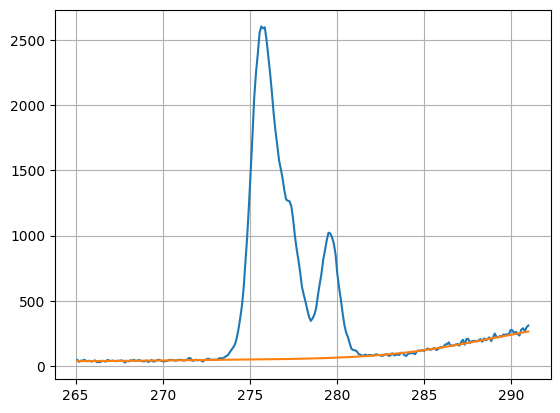

In [5]:
fig, axe = plt.subplots()
axe.plot(x, y)
axe.plot(x, background)
axe.grid()

In [6]:
def peak(x, x0, s, A):
    law = stats.norm(loc=x0, scale=s)
    return A * law.pdf(x) / law.pdf(x0)

In [7]:
def model(x, x0, s0, A0, x1, s1, A1, x2, s2, A2):
    return peak(x, x0, s0, A0) + peak(x, x1, s1, A1) + peak(x, x2, s2, A2)

In [8]:
yb = y - background

In [9]:
p0=[523, 1, 2000, 524, 1, 2000, 525, 1, 2000]
p0=[275, 1, 2000, 277, 1, 1000, 280, 1, 1000]

In [10]:
popt, pcov = optimize.curve_fit(model, x, yb, p0=p0)
popt, pcov

(array([2.75675544e+02, 6.03716137e-01, 2.42354416e+03, 2.77148084e+02,
        7.22973438e-01, 1.13012651e+03, 2.79593563e+02, 5.23256131e-01,
        9.47915052e+02]),
 array([[ 5.77999736e-05,  2.84601882e-05,  1.49385294e-01,
          1.48964282e-04, -1.01162355e-04, -7.36019622e-02,
         -1.19148424e-05,  1.23727824e-05, -7.50766205e-04],
        [ 2.84601882e-05,  1.80486884e-05,  6.80355584e-02,
          7.64564268e-05, -4.83531831e-05, -4.26918597e-02,
         -5.29485408e-06,  5.39979830e-06, -1.82674452e-04],
        [ 1.49385294e-01,  6.80355584e-02,  4.59730139e+02,
          4.05185087e-01, -2.98369090e-01, -1.72917102e+02,
         -3.79562468e-02,  4.01849318e-02, -3.55409352e+00],
        [ 1.48964282e-04,  7.64564268e-05,  4.05185087e-01,
          4.11642408e-04, -2.70271041e-04, -1.92661776e-01,
         -2.96889418e-05,  2.98598841e-05, -4.89963246e-04],
        [-1.01162355e-04, -4.83531831e-05, -2.98369090e-01,
         -2.70271041e-04,  2.14640550e-04,  1.

In [11]:
yhat = model(x, *popt)

In [12]:
popt

array([2.75675544e+02, 6.03716137e-01, 2.42354416e+03, 2.77148084e+02,
       7.22973438e-01, 1.13012651e+03, 2.79593563e+02, 5.23256131e-01,
       9.47915052e+02])

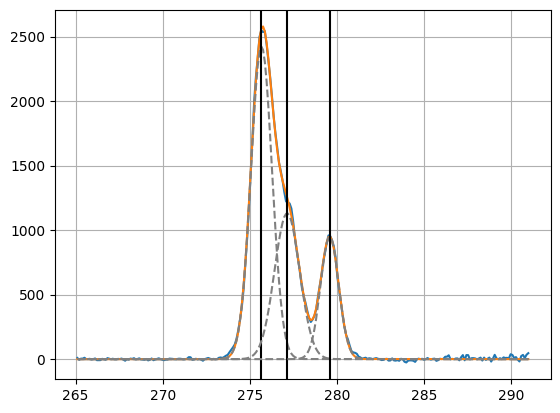

In [13]:
fig, axe = plt.subplots()
axe.plot(x, yb)
axe.plot(x, yhat)
for i in range(3):
    axe.plot(x, peak(x, *popt[i*3:(i+1)*3]), "--", color="gray")
    axe.axvline(popt[i*3], color="black")
axe.grid()